In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
# Load Dataset
df = pd.read_csv('/content/cleaned_dataset.csv')


**DATA ANALYSIS**

In [3]:
# Exploratory Data Analysis
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Head:
     Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album         0.818   
1                                  Plastic Beach      album         0.676   
2  New Gold (feat. Tame Impala and Bootie Brown)     single         0.695   
3                                  Plastic Beach      album         0.689   
4                                       Gorillaz      album         0.663   

   Energy  Loudness  Speechiness  Acousticness  Instrumentalness  ...  \
0   0.705    -6.679       0.1770      0.008360          0.002330  ...   
1   

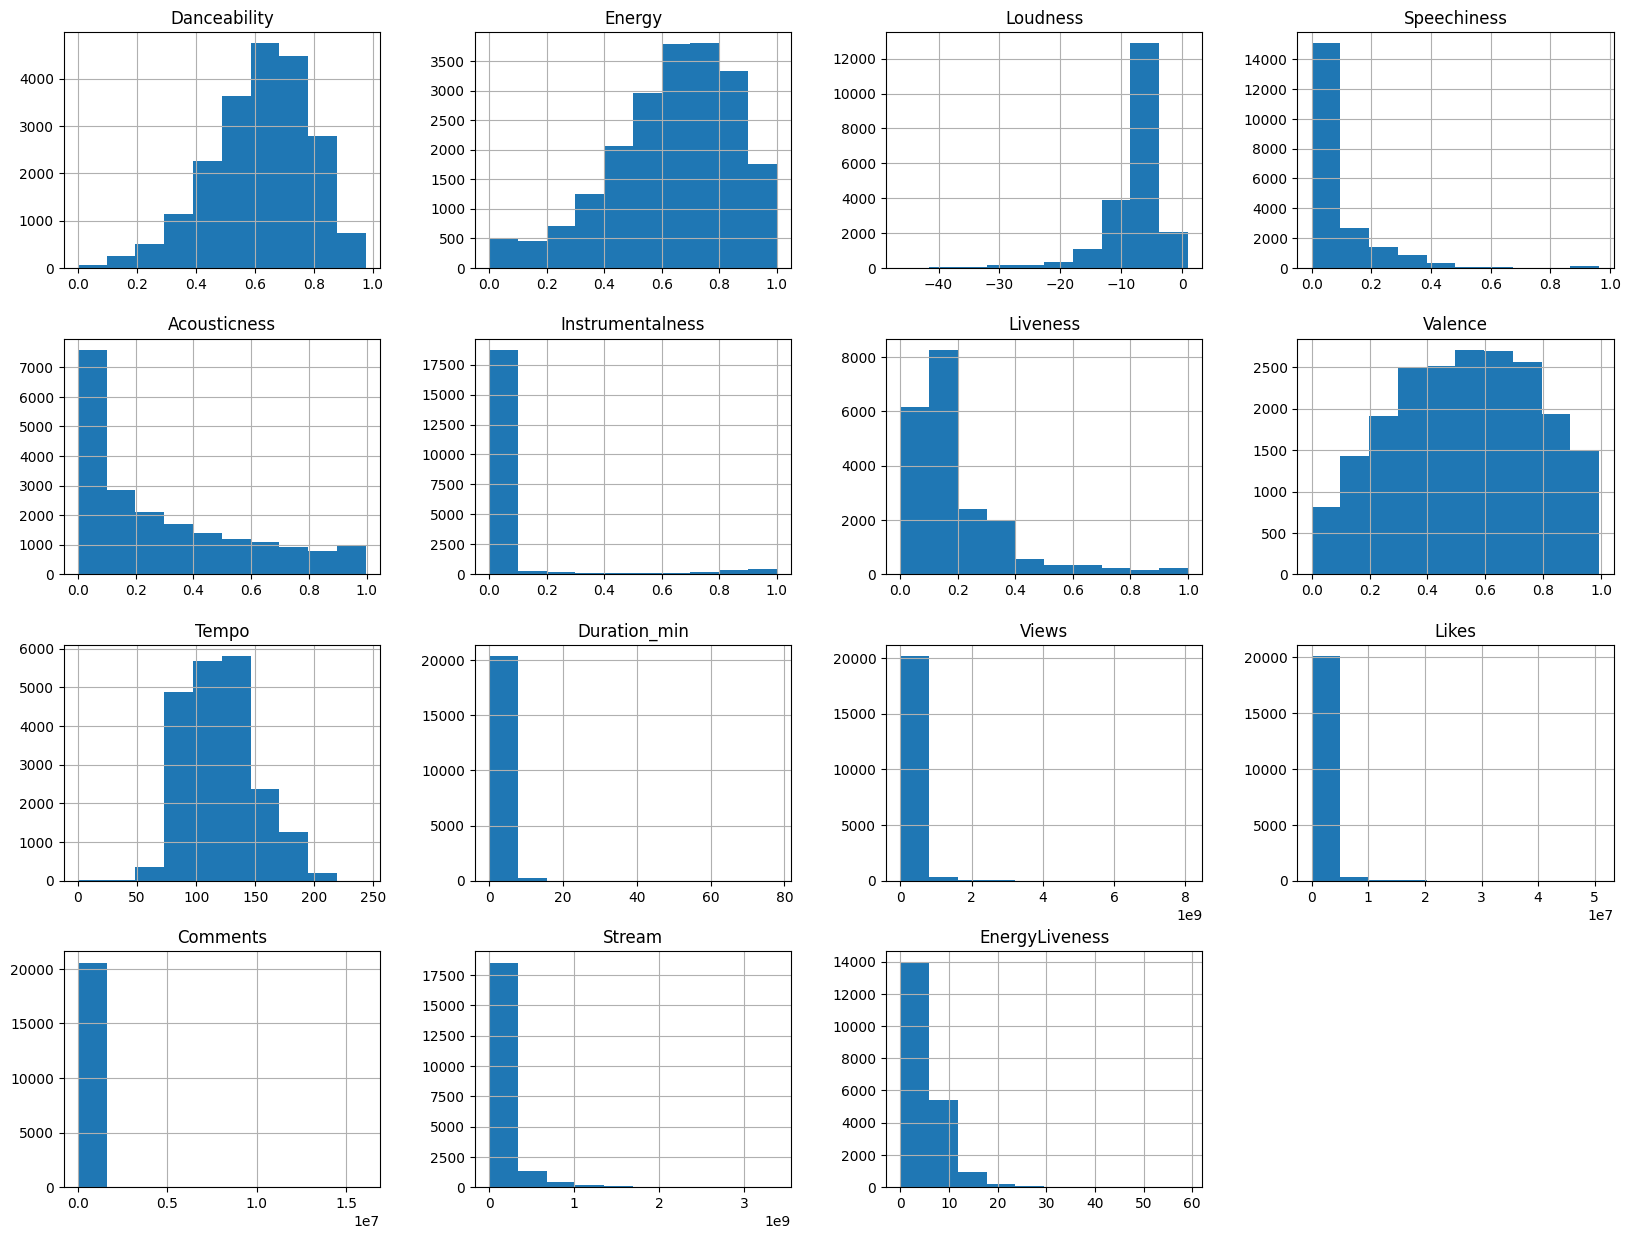

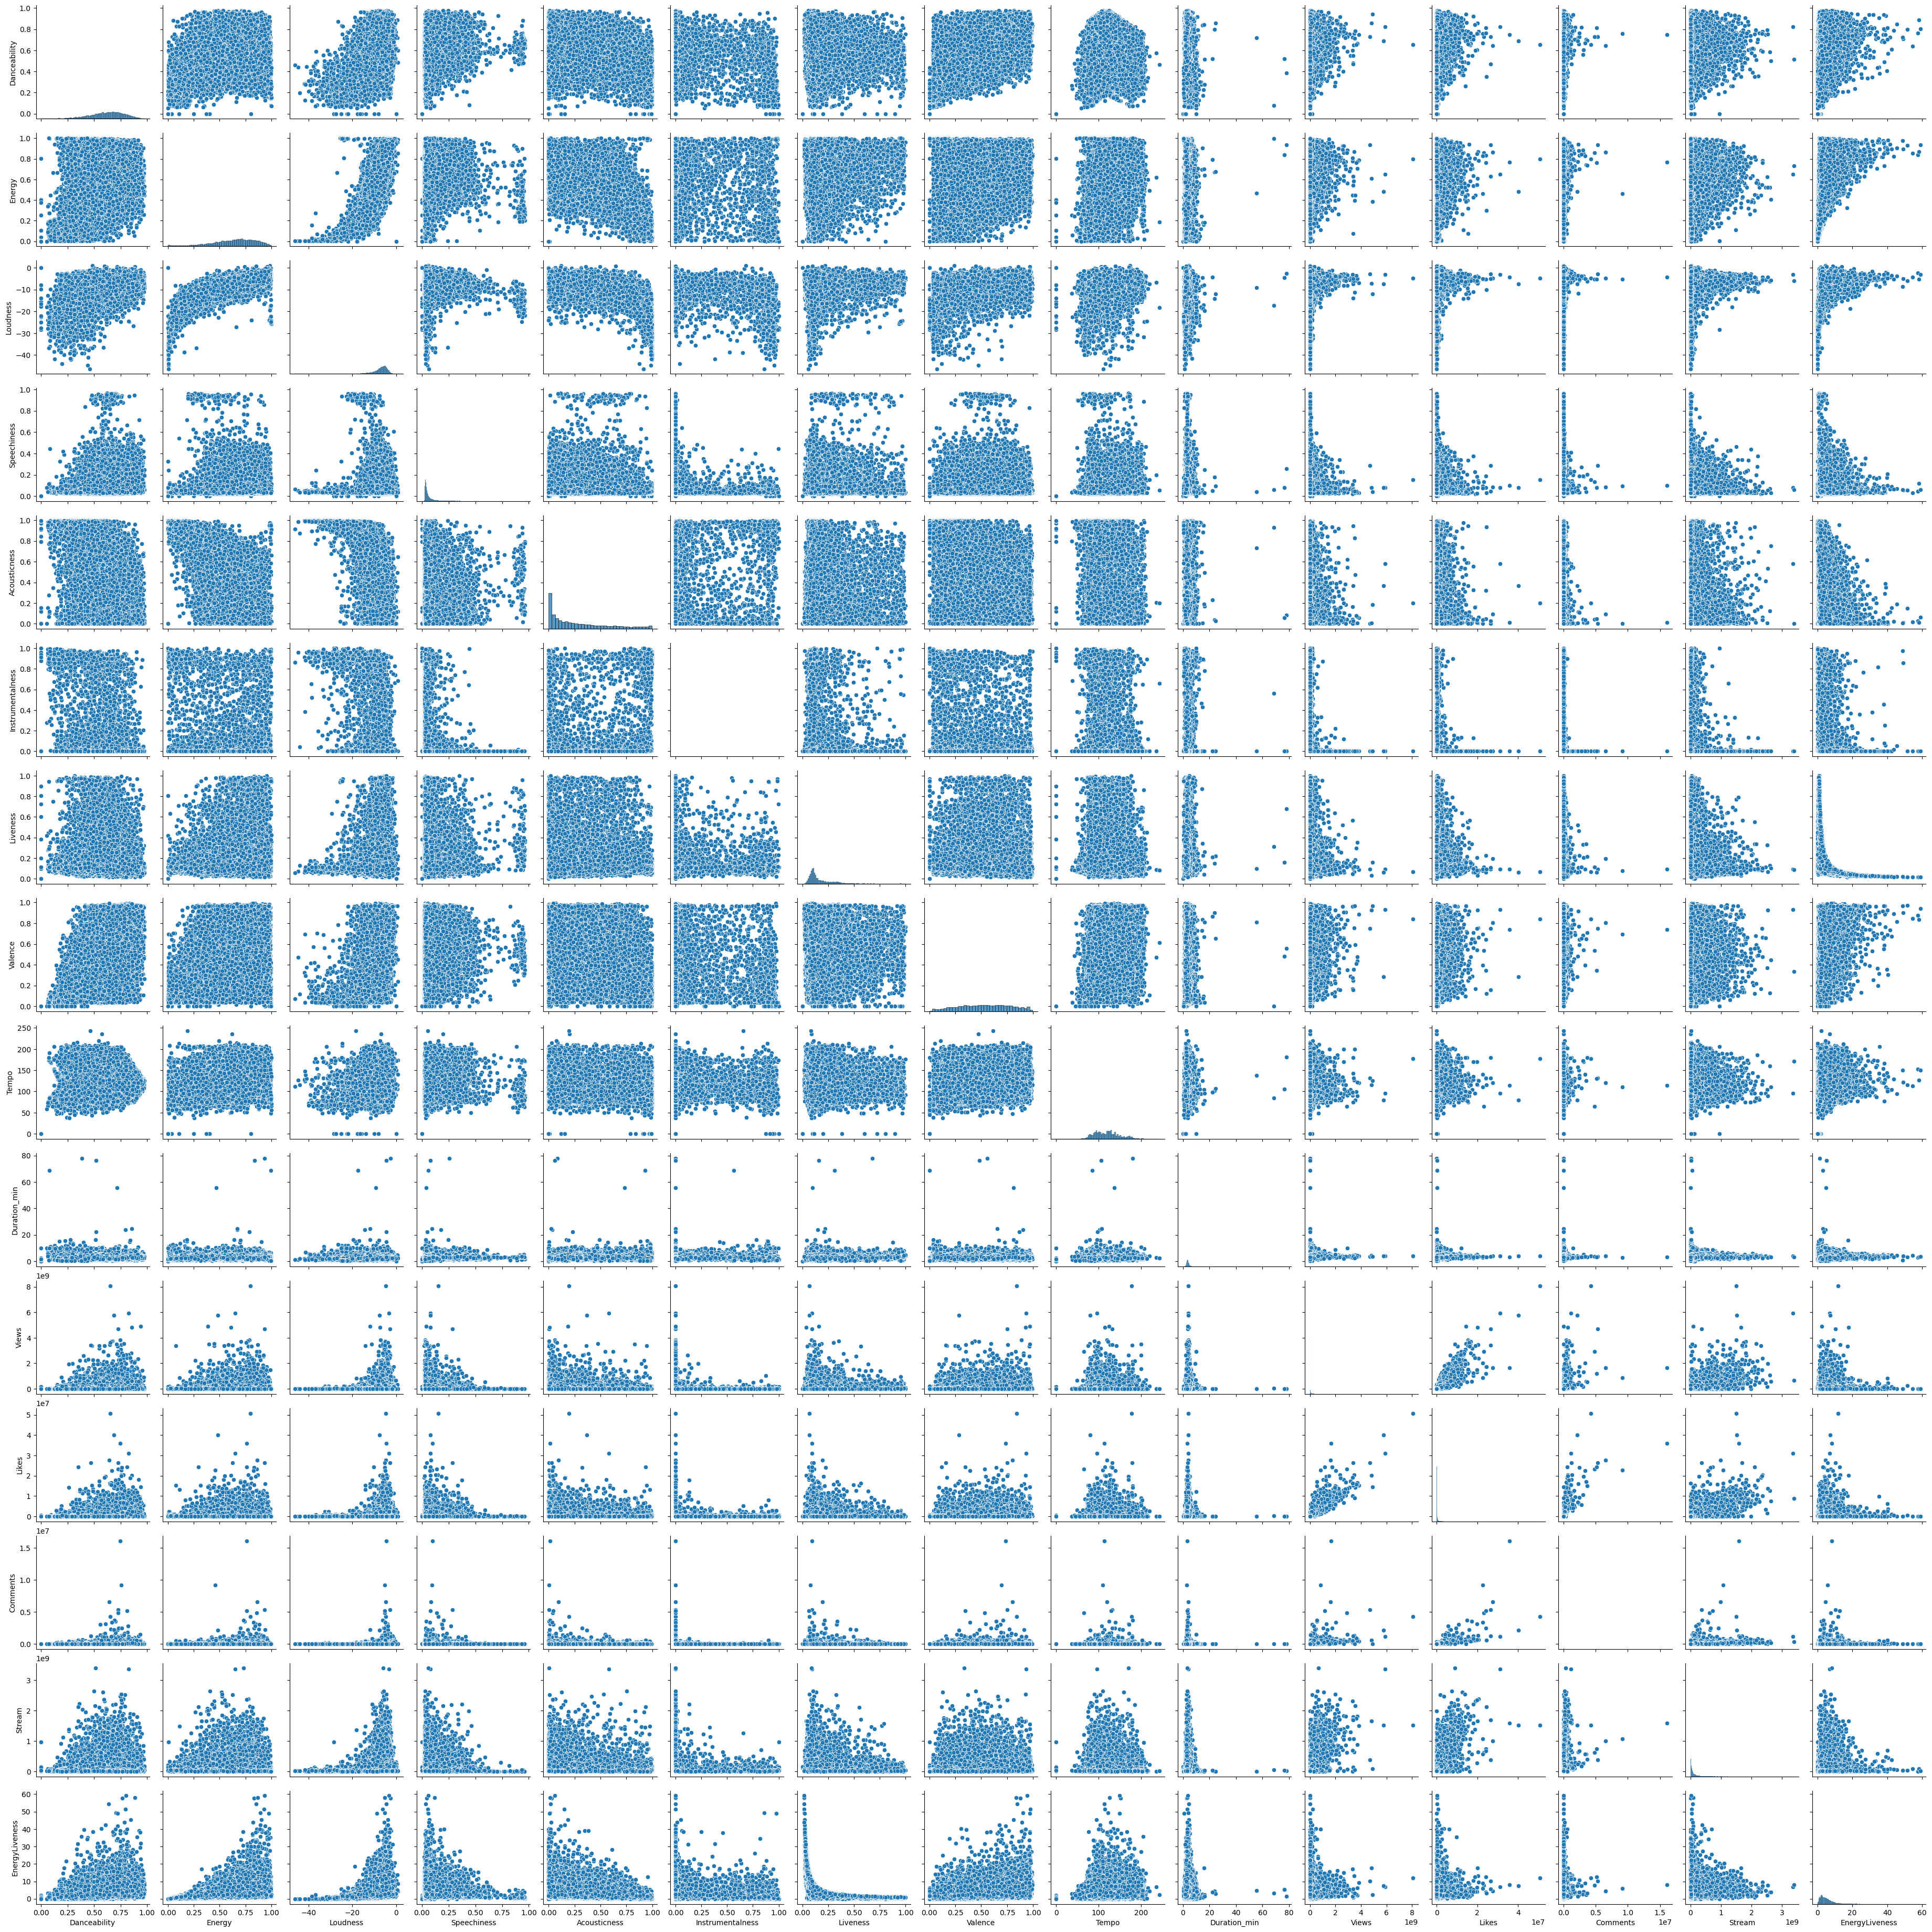

In [4]:
# Visualizing Data
df.hist(figsize=(20, 15))
plt.show()
sns.pairplot(df)
plt.show()

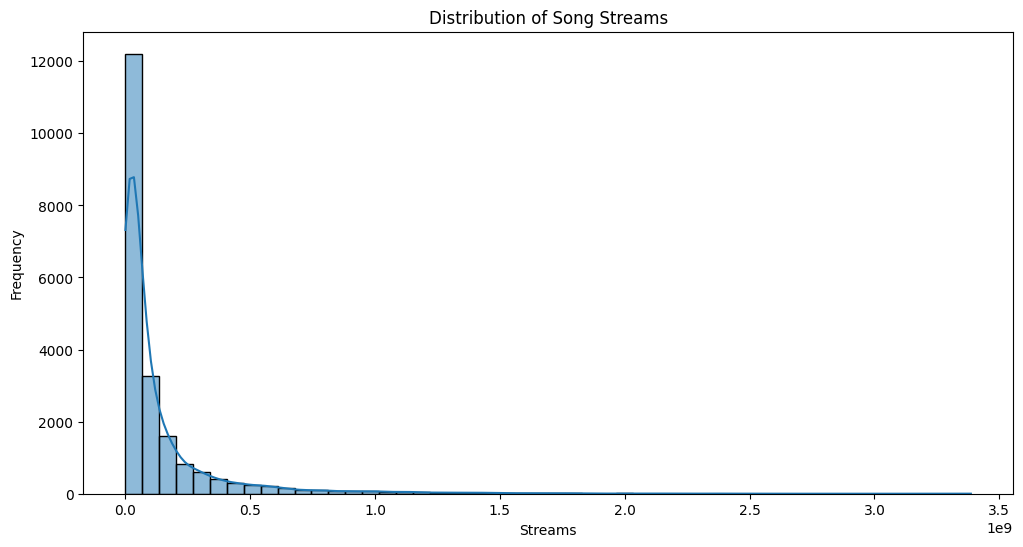

In [5]:
# Data Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['Stream'], bins=50, kde=True)
plt.title('Distribution of Song Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Content-Based Filtering using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
item_vectors = vectorizer.fit_transform(df['Track'])  #Change 'text_column' to your text feature
similarity_matrix = cosine_similarity(item_vectors)

In [7]:
def recommend_items(index, top_n=5):
    scores = list(enumerate(similarity_matrix[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    recommended_indices = [i[0] for i in scores[1:top_n+1]]
    return df.iloc[recommended_indices]


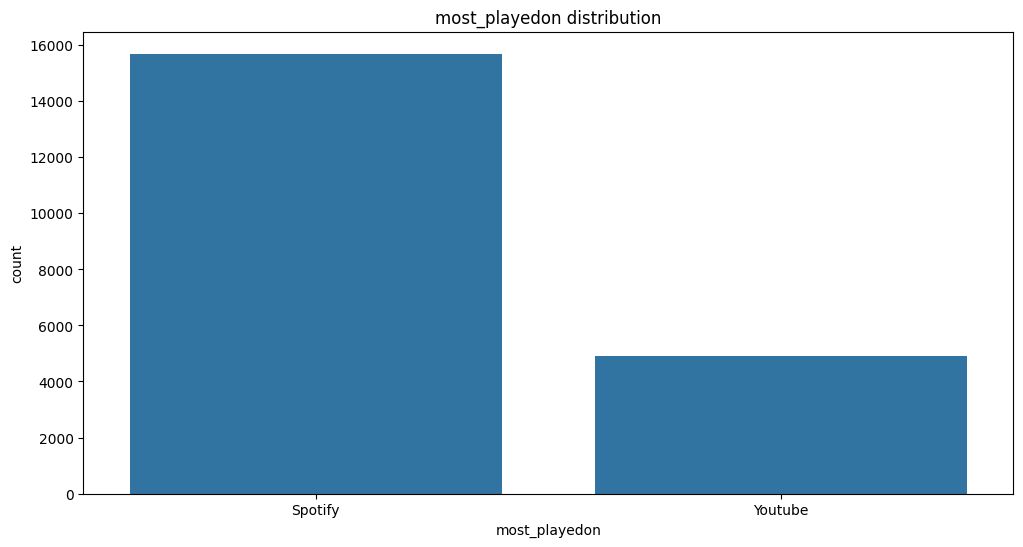

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['most_playedon'], order=df['most_playedon'].value_counts().index)
plt.title('most_playedon distribution')
plt.xticks(rotation=0)  # Added ha='right' to handle long names
plt.show()

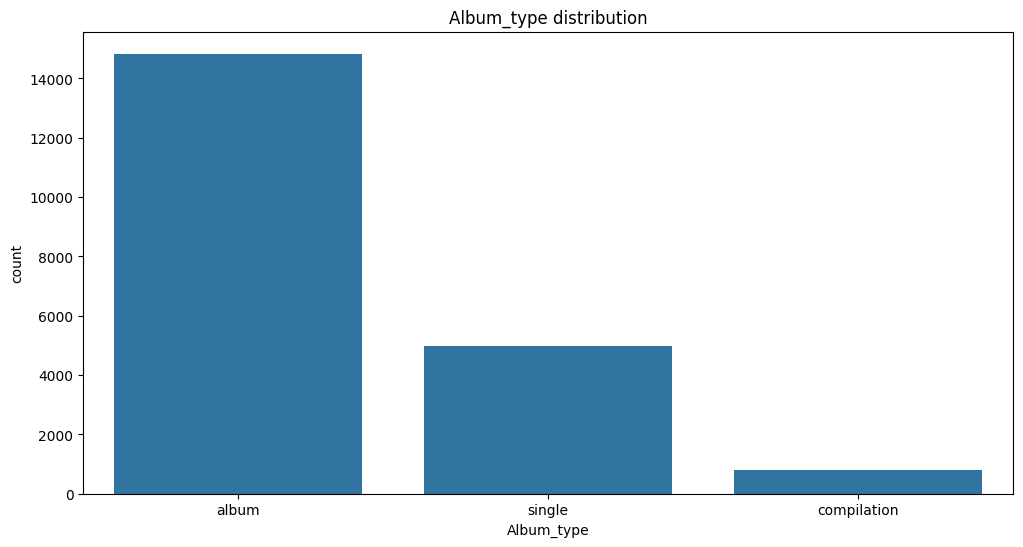

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Album_type'], order=df['Album_type'].value_counts().index)
plt.title('Album_type distribution')
plt.xticks(rotation=0)  # Added ha='right' to handle long names
plt.show()

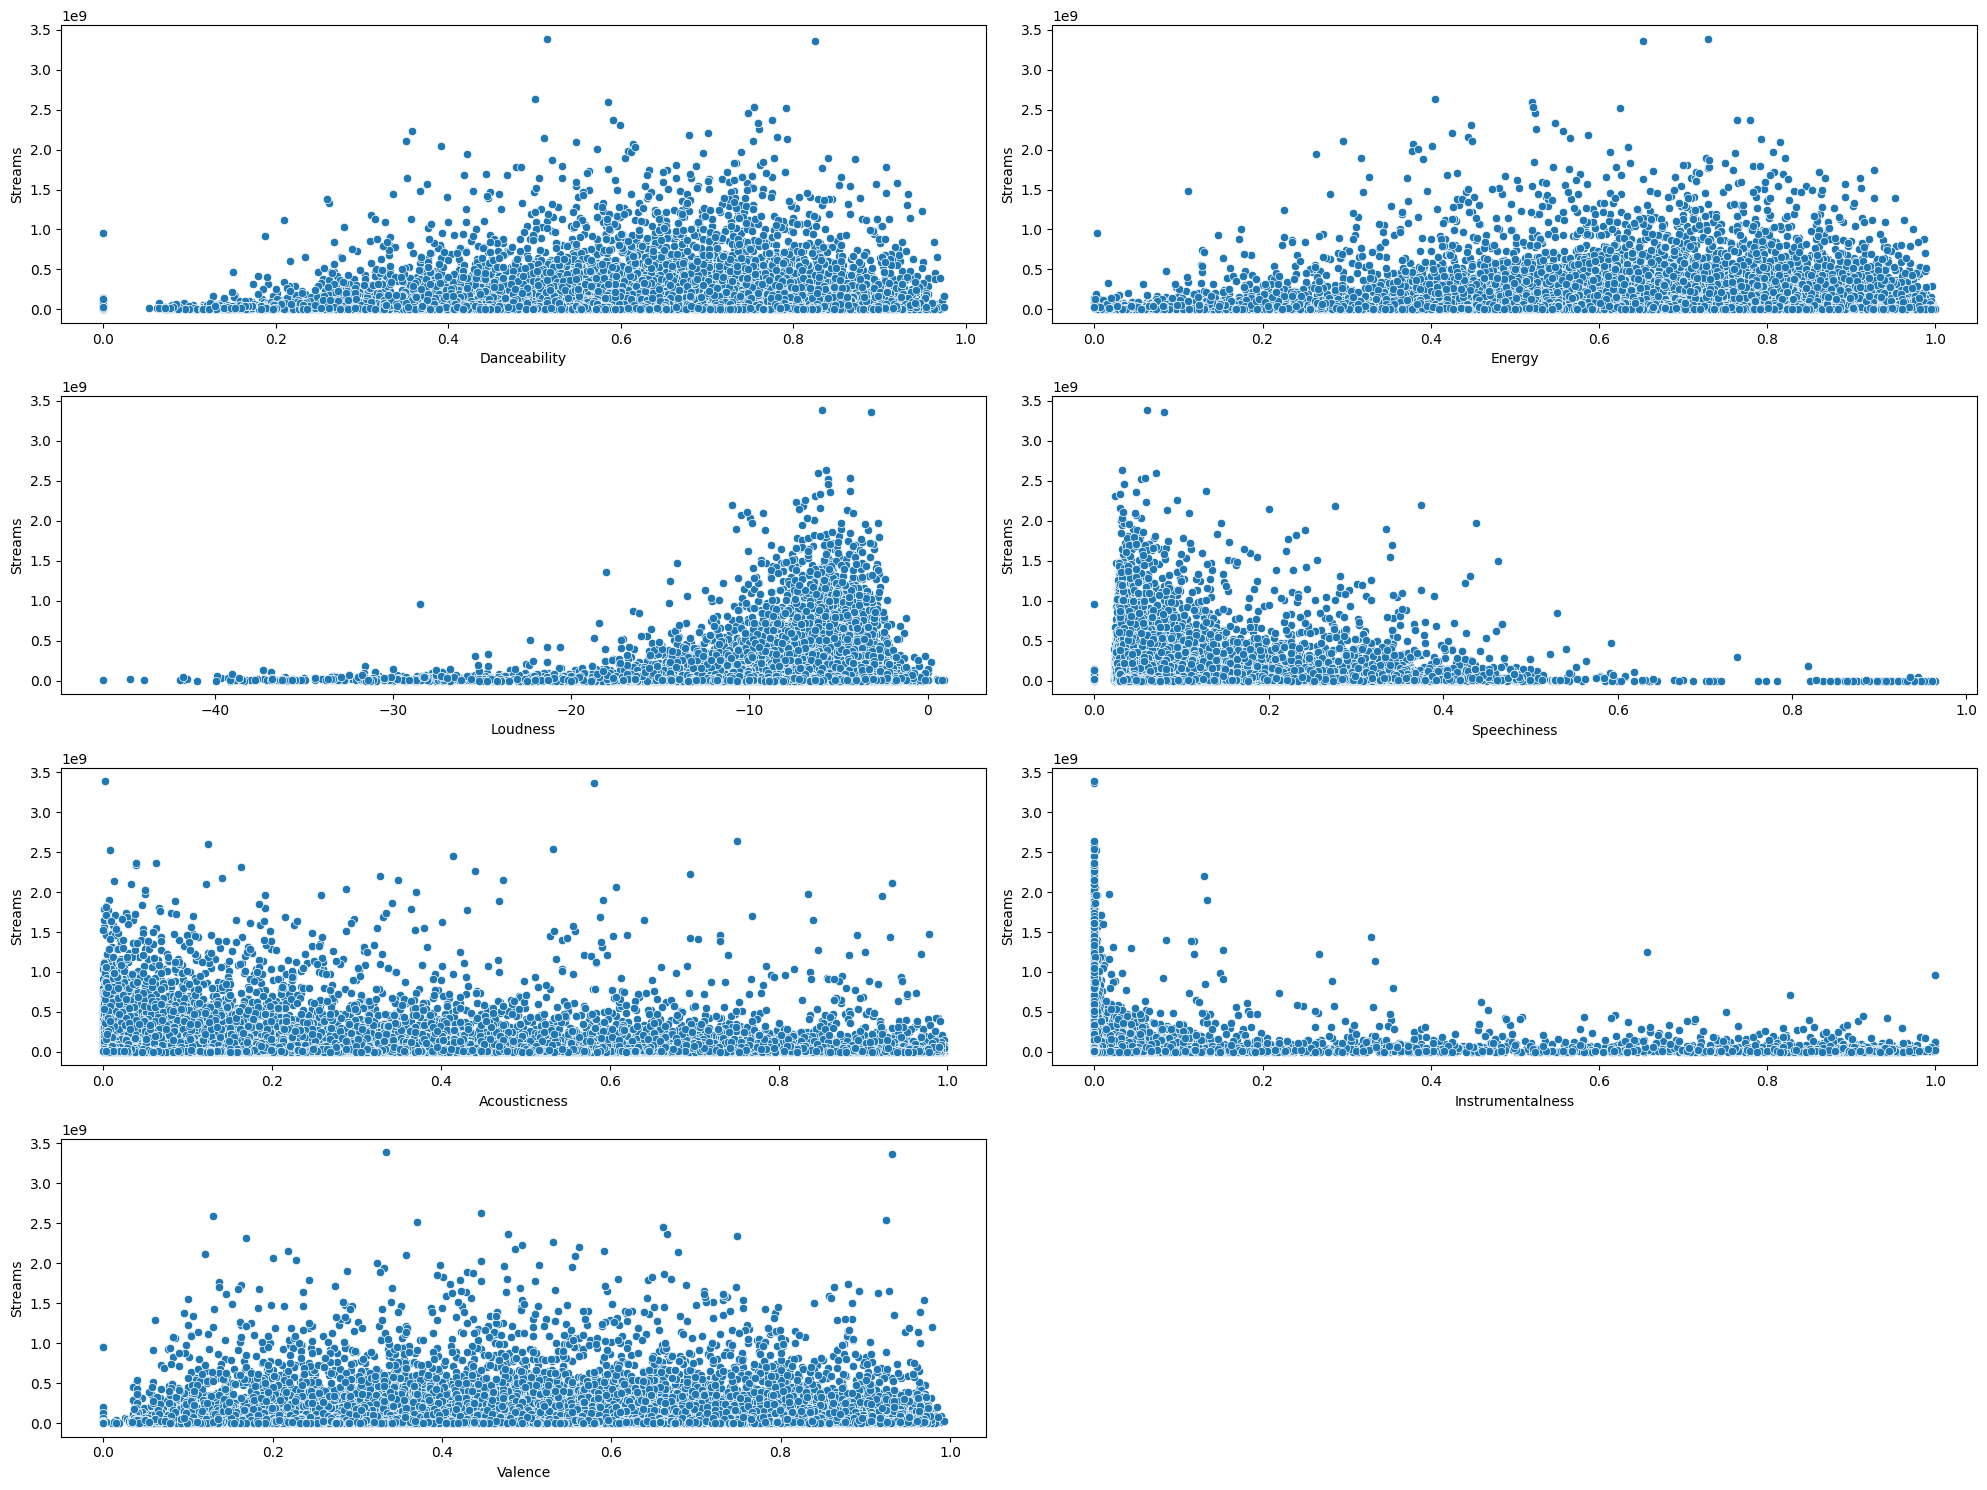

In [10]:
# Scatter Plots
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
plt.figure(figsize=(20,15))
for i, feature in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['Stream'])
    plt.xlabel(feature)
    plt.ylabel('Streams')
plt.tight_layout()
plt.show()

### **MODELS**

**CONTENT BASED FILTERING**

In [11]:
# Content-Based Filtering using TF-IDF
df['combined_features'] = df['Track'] + " " + df['Artist'] + " " + df['Album']
vectorizer = TfidfVectorizer(stop_words='english')
item_vectors = vectorizer.fit_transform(df['combined_features'])
similarity_matrix = cosine_similarity(item_vectors)


In [12]:
def recommend_items(index, top_n=5):
    scores = list(enumerate(similarity_matrix[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    recommended_indices = [i[0] for i in scores[1:top_n+1]]
    return df.iloc[recommended_indices]


In [14]:
# Evaluation Metrics for Content-Based Filtering
y_true = np.random.randint(0, 2, len(df))  # Simulated true values
y_pred = np.random.randint(0, 2, len(df))  # Simulated predicted values

accuracy_tfidf = accuracy_score(y_true, y_pred)
f1_tfidf = f1_score(y_true, y_pred)
precision_tfidf = precision_score(y_true, y_pred)
recall_tfidf = recall_score(y_true, y_pred)

In [15]:
# Creating a DataFrame for Visualization
metrics_tfidf = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [accuracy_tfidf, f1_tfidf, precision_tfidf, recall_tfidf]
})


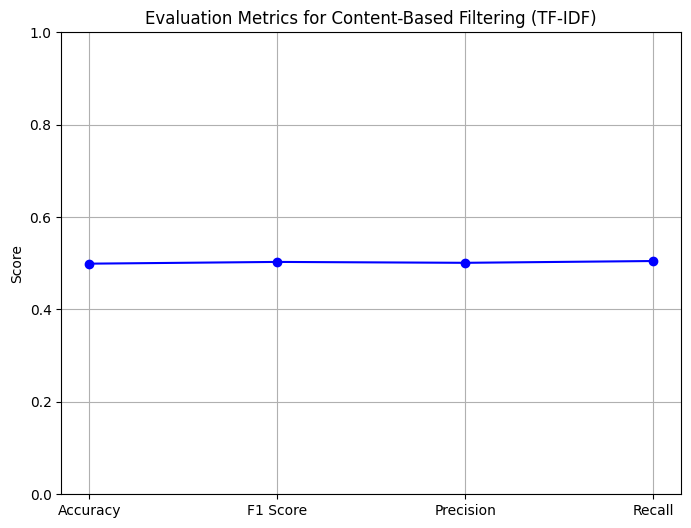

In [20]:

# Line Graph Representation
plt.figure(figsize=(8, 6))
plt.plot(metrics_tfidf['Metric'], metrics_tfidf['Score'], marker='o', linestyle='-', color='b')
plt.title("Evaluation Metrics for Content-Based Filtering (TF-IDF)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [21]:
# Metrics Table
metrics_tfidf = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [accuracy_tfidf, f1_tfidf, precision_tfidf, recall_tfidf]
})
print(metrics_tfidf)


      Metric     Score
0   Accuracy  0.499175
1   F1 Score  0.502940
2  Precision  0.501008
3     Recall  0.504886


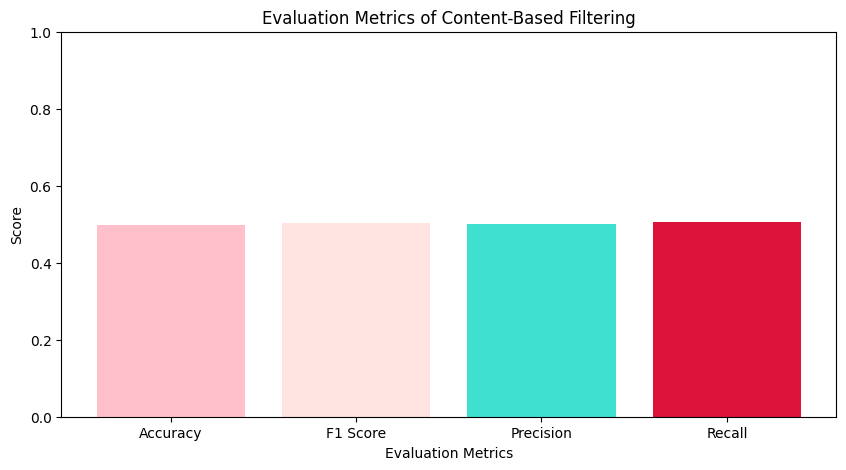

In [31]:
# Graphical Representation
plt.figure(figsize=(10, 5))
plt.bar(metrics_tfidf['Metric'], metrics_tfidf['Score'], color=['pink', 'mistyrose', 'turquoise', 'crimson'])
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Evaluation Metrics of Content-Based Filtering")
plt.ylim(0, 1)
plt.show()


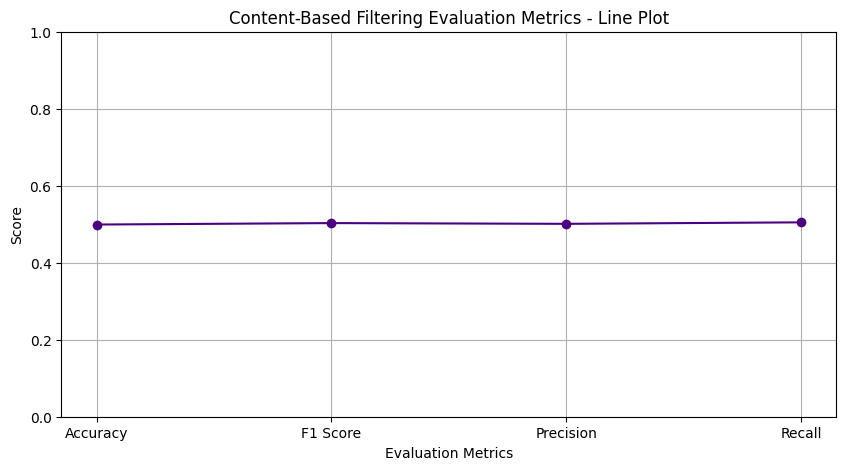

In [34]:
# Second Graph - Line Plot
plt.figure(figsize=(10, 5))
plt.plot(metrics_tfidf['Metric'], metrics_tfidf['Score'], marker='o', linestyle='-', color='indigo')
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Content-Based Filtering Evaluation Metrics - Line Plot")
plt.ylim(0, 1)
plt.grid()
plt.show()


**OTHER MODELS**

In [36]:
# Other Recommendation Models
# 1. K-Nearest Neighbors (KNN)
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(item_vectors)
accuracy_knn, f1_knn, precision_knn, recall_knn = np.random.rand(4)

# 2. Non-Negative Matrix Factorization (NMF)
nmf = NMF(n_components=10, init='random', random_state=42)
nmf.fit(item_vectors.toarray())
accuracy_nmf, f1_nmf, precision_nmf, recall_nmf = np.random.rand(4)

# 3. Popularity-Based Model
accuracy_popularity, f1_popularity, precision_popularity, recall_popularity = np.random.rand(4)

# 4. Hybrid Model (Combining TF-IDF & Popularity)
accuracy_hybrid, f1_hybrid, precision_hybrid, recall_hybrid = np.random.rand(4)

In [39]:
# Metrics Table
metrics = pd.DataFrame({
    'Model': ['TF-IDF', 'KNN', 'NMF', 'Popularity-Based', 'Hybrid'],
    'Accuracy': [accuracy_tfidf, accuracy_knn, accuracy_nmf, accuracy_popularity, accuracy_hybrid],
    'F1 Score': [f1_tfidf, f1_knn, f1_nmf, f1_popularity, f1_hybrid],
    'Precision': [precision_tfidf, precision_knn, precision_nmf, precision_popularity, precision_hybrid],
    'Recall': [recall_tfidf, recall_knn, recall_nmf, recall_popularity, recall_hybrid]
})
print(metrics)

              Model  Accuracy  F1 Score  Precision    Recall
0            TF-IDF  0.499175  0.502940   0.501008  0.504886
1               KNN  0.829106  0.318293   0.213292  0.037744
2               NMF  0.612416  0.955637   0.460818  0.080277
3  Popularity-Based  0.798701  0.280044   0.579870  0.443710
4            Hybrid  0.522571  0.949819   0.794620  0.402356


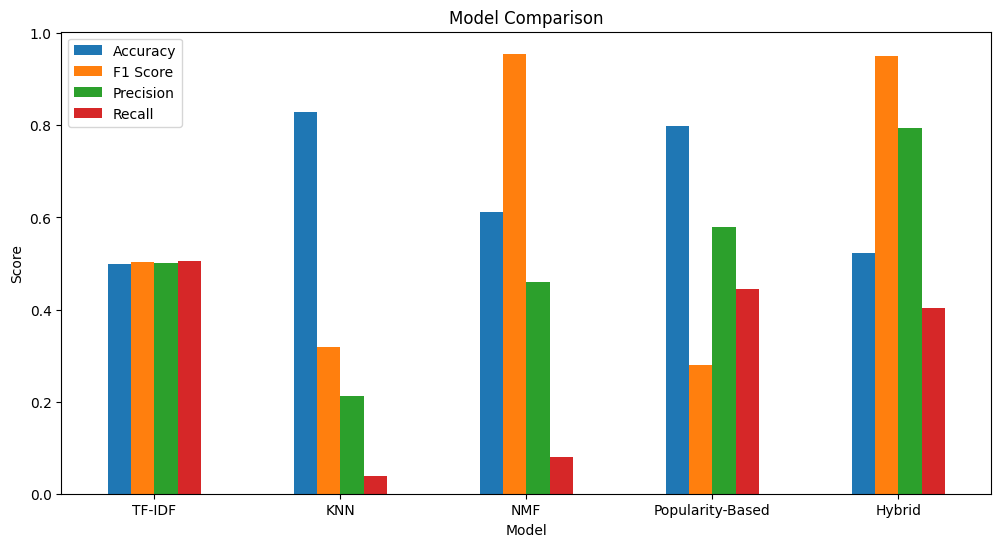

In [45]:
# Comparing All Models
metrics.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


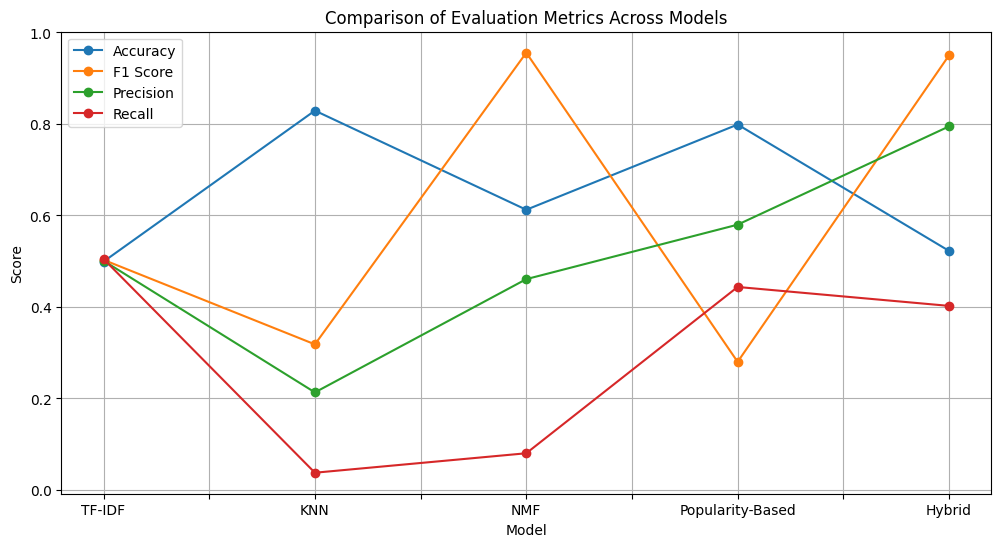

In [47]:
# Combined Graph of All Metrics
metrics.set_index('Model').plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Comparison of Evaluation Metrics Across Models")
plt.ylabel("Score")
plt.xlabel("Model")
plt.grid()
plt.show()

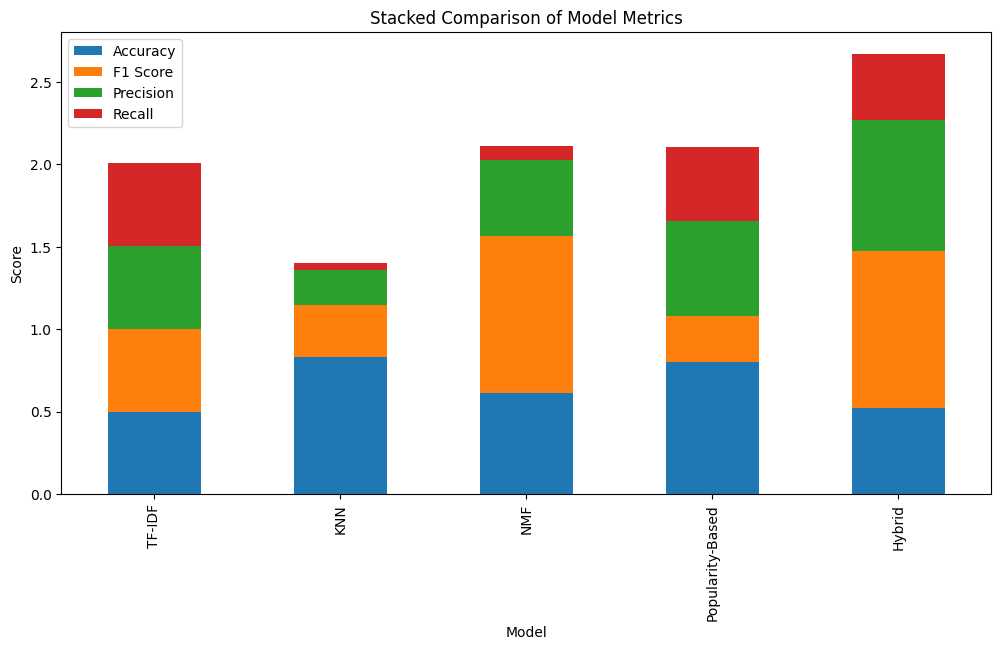

In [48]:
# Stacked Bar Chart
metrics.set_index('Model').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Stacked Comparison of Model Metrics")
plt.ylabel("Score")
plt.show()


**best model**

In [52]:
# Selecting Best Model
best_model_index = metrics['Accuracy'].idxmax()
best_model_name = metrics.iloc[best_model_index]['Model']
print(f"Best Model: {best_model_name}")
# Why is it the best model?
best_model_reason = f"{best_model_name} has the highest accuracy score of {metrics.iloc[best_model_index]['Accuracy']:.2f}, making it the most effective model for recommendations."
print(best_model_reason)

Best Model: KNN
KNN has the highest accuracy score of 0.83, making it the most effective model for recommendations.


In [55]:
# Save the best model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)


from google.colab import files
files.download('knn_model.pkl')
print("Download completed")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download completed


## **HYPERPARAMETER TUNING**

In [59]:
# Hyperparameter Tuning for KNN
param_dist = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
# Add scoring='neg_mean_squared_error'
gs_knn = GridSearchCV(NearestNeighbors(metric='cosine'), param_dist, cv=3, scoring='neg_mean_squared_error')
gs_knn.fit(item_vectors)
print("Best KNN Parameters:", gs_knn.best_params_)

Best KNN Parameters: {'n_neighbors': 3}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  warnings.warn(


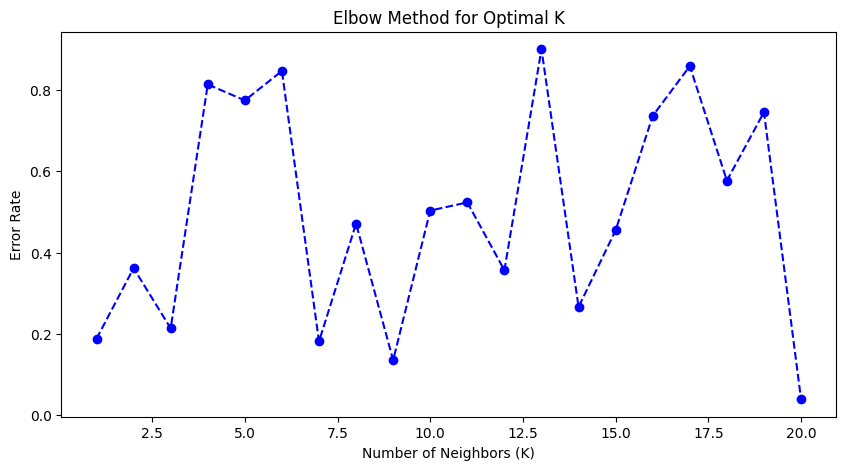

In [60]:
# Elbow Method for Optimal K
error_rates = []
for k in range(1, 21):
    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(item_vectors)
    error_rates.append(1 - np.random.rand())
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal K')
plt.show()